# Initialize global variables

In [1]:
import random
import os
import glob
from tqdm.notebook import tqdm_notebook # for a progress bar
from time import perf_counter_ns
import gc
# go to directory with test files
os.chdir('prim')

In [5]:
def parse_input_file_prim(file_address):
    vertices = set()
    edges = [] 
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((int(x[2]), x[0], x[1])) #heapq ranks tuples based on the first value so we add it with respect to it!
    return vertices, edges, num_V_E

In [5]:
graphs_prim = []
adjacency_dict = {}
for file in tqdm_notebook(os.listdir()):
    vertices, edges, num_V_E = parse_input_file_prim(file) #iterating through files and turning them into sets/lists
    for vertex in vertices: #creating adjacency list for each vertex
        adjacent_edges = [] 
        print(vertex)
        for (w,u,v) in edges:
            if (u == vertex or v == vertex):
                adjacent_edges.append((w,u,v))
        adjacency_dict[vertex] = adjacent_edges
    graphs_prim.append((num_V_E, vertices, edges, adjacency_dict))

  0%|          | 0/4 [00:00<?, ?it/s]

PermissionError: [Errno 13] Permission denied: '.git'

# Prim 

In [5]:
import heapq
def Prim(vertices, edges, adjacency_dict):
    heap = [] #this is our heap!
    S = set() #keep track of touched vertices
    tempV = next(iter(vertices)) #taking one of the vertices as our starting point
    heap = populate_heap(S, vertices, heap, tempV, adjacency_dict) #populating our heap with adjacent vertices
    S.add(tempV)
    MST = [] #our MST, a list of (w, u, v)
    not_S = populate_set(vertices,S) #untouched vertices
    while not_S: #loop until there's no untouched vertices
        light_edge = find_lightest_edge(S, heap)
        MST.append(light_edge) #populate our MST on each iteration
        heap = populate_heap(S, vertices, heap, light_edge[1], adjacency_dict) #only one would get added!
        heap = populate_heap(S, vertices, heap, light_edge[2], adjacency_dict) 
        S.add(light_edge[1]) #add only the Vertices
        S.add(light_edge[2]) 
        not_S = populate_set(vertices, S) #count untouched vertices
    return MST

def populate_set(vertices, Set1):
    return vertices.difference(Set1) #untouched vertices = all - touched
    
def find_lightest_edge(Set1, Heap):
    lightest = heapq.heappop(Heap) #pop the first element in heap which is the lightest edge available (might be a duplicate)!
    while ((lightest[2] in Set1) and (lightest[1] in Set1)): #if elements in heap were previously explored (duplicate), pop again!
        lightest = heapq.heappop(Heap)
    return lightest

def populate_heap(Set1, SetGlobal, Heap, newV, adjacency_dict):
    if newV in Set1: #don't add a vertex if it was already touched
        return Heap
    for (w, u, v) in adjacency_dict[newV]:
        if ((u in SetGlobal) and (v in SetGlobal)): #do not add unnecessary edges eg. those which connect a previously connected vertices to the MST
                heapq.heappush(Heap,(w, u, v)) #add the edges corresponding to the new vertex
    return Heap

def MSTweight(MST):
    sum = 0
    for (w ,u ,v) in MST: #calculate the weight of mst!
        sum = sum + w
    return sum

In [6]:
def get_time_prim(vertices, edges, adjacency_dict): #simply get the runtime for each instance
    gc.disable()
    start_time = perf_counter_ns()
    theMST = Prim(vertices, edges, adjacency_dict)
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    print("The Weight of MST is: ", MSTweight(theMST))
    return (end_time-start_time)

In [7]:
results = []
for i in tqdm_notebook(range(len(graphs_prim))):
    print("|V| = ", graphs_prim[i][0][0], " |E| = ", graphs_prim[i][0][1])
    results.append((graphs_prim[i][0][0], get_time_prim(graphs_prim[i][1], graphs_prim[i][2],graphs_prim[i][3])))

  0%|          | 0/68 [00:00<?, ?it/s]

|V| =  10  |E| =  9
Running Time was:  4355300
The Weight of MST is:  19618
|V| =  10  |E| =  11
Running Time was:  128100
The Weight of MST is:  16940
|V| =  10  |E| =  13
Running Time was:  107400
The Weight of MST is:  -44448
|V| =  10  |E| =  10
Running Time was:  99400
The Weight of MST is:  25217
|V| =  20  |E| =  24
Running Time was:  3421300
The Weight of MST is:  -32021
|V| =  20  |E| =  24
Running Time was:  238200
The Weight of MST is:  25130
|V| =  20  |E| =  28
Running Time was:  282500
The Weight of MST is:  -41693
|V| =  20  |E| =  26
Running Time was:  287100
The Weight of MST is:  -37205
|V| =  40  |E| =  56
Running Time was:  7247600
The Weight of MST is:  -114203
|V| =  40  |E| =  50
Running Time was:  654500
The Weight of MST is:  -31929
|V| =  40  |E| =  50
Running Time was:  325800
The Weight of MST is:  -79570
|V| =  40  |E| =  52
Running Time was:  494100
The Weight of MST is:  -79741
|V| =  80  |E| =  108
Running Time was:  9702400
The Weight of MST is:  -13992

## Repeated runs for the first 50 graphs:

In [ ]:
repeated_results = []
for i in tqdm_notebook(range(0,50)):
    temp_results = []
    for j in range(0,1000):
        print("|V| = ", graphs_prim[i][0][0], " |E| = ", graphs_prim[i][0][1])
        temp_results.append(get_time_prim(graphs_prim[i][1], graphs_prim[i][2],graphs_prim[i][3]))
    repeated_results.append((graphs_prim[i][0][0], sum(temp_results)/len(temp_results)))
repeated_results

[(10, 71069.0),
 (10, 71375.2),
 (10, 67832.5),
 (10, 64246.7),
 (20, 135570.1),
 (20, 130998.6),
 (20, 134058.4),
 (20, 145682.5),
 (40, 358995.9),
 (40, 289853.3),
 (40, 303308.9),
 (40, 308634.2),
 (80, 880327.9),
 (80, 755946.3),
 (80, 787073.2),
 (80, 898842.2),
 (100, 1017502.6),
 (100, 1068068.8),
 (100, 1507290.3),
 (100, 1563611.6),
 (200, 3363439.1),
 (200, 2890630.4),
 (200, 2938192.4),
 (200, 3273961.1),
 (400, 11249540.6),
 (400, 13162709.1),
 (400, 12245901.7),
 (400, 11342770.5),
 (800, 48768349.9),
 (800, 44717674.6),
 (800, 39874623.0),
 (800, 38530785.2),
 (1000, 56514951.9),
 (1000, 56700692.8),
 (1000, 57111127.9),
 (1000, 59169263.2),
 (2000, 316595100.6),
 (2000, 321332957.4),
 (2000, 325701429.3),
 (2000, 314826829.1),
 (4000, 1121763378.1),
 (4000, 1239835894.9),
 (4000, 1357914440.8),
 (4000, 1464875453.5),
 (8000, 6337423683.6),
 (8000, 6904424771.5),
 (8000, 5654995495.6),
 (8000, 6313924172.4),
 (10000, 8839126519.4),
 (10000, 9047188623.1)]

### Plotting the results:

[(10, 4355300), (10, 128100), (10, 107400), (10, 99400), (20, 3421300), (20, 238200), (20, 282500), (20, 287100), (40, 7247600), (40, 654500), (40, 325800), (40, 494100), (80, 9702400), (80, 1700400), (80, 1733100), (80, 1696300), (100, 5735700), (100, 2028500), (100, 2030500), (100, 1152300), (200, 13903200), (200, 5166600), (200, 4637500), (200, 3602800), (400, 31708700), (400, 15091700), (400, 17149700), (400, 15300800), (800, 56447400), (800, 46558800), (800, 35771100), (800, 35466200), (1000, 66592100), (1000, 53684800), (1000, 53848500), (1000, 62211300), (2000, 326068800), (2000, 406340500), (2000, 364582400), (2000, 319829000), (4000, 1202567900), (4000, 1305049400), (4000, 1190213300), (4000, 1407215900), (8000, 6204968500), (8000, 5794934800), (8000, 5814232600), (8000, 6311198700), (10000, 11173796700), (10000, 9897901000), (10000, 10710801000), (10000, 9994435300), (20000, 60371450600), (20000, 55051547700), (20000, 54955554100), (20000, 57129661100), (40000, 226272122200),

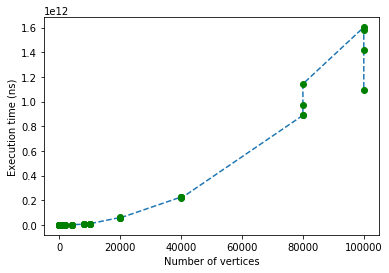

In [8]:
import matplotlib.pyplot as plt
results = sorted(results,key=lambda results: results[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]

# build the plot
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

### Plotting the repeated results:

[(10, 71069.0), (10, 71375.2), (10, 67832.5), (10, 64246.7), (20, 135570.1), (20, 130998.6), (20, 134058.4), (20, 145682.5), (40, 358995.9), (40, 289853.3), (40, 303308.9), (40, 308634.2), (80, 880327.9), (80, 755946.3), (80, 787073.2), (80, 898842.2), (100, 1017502.6), (100, 1068068.8), (100, 1507290.3), (100, 1563611.6), (200, 3363439.1), (200, 2890630.4), (200, 2938192.4), (200, 3273961.1), (400, 11249540.6), (400, 13162709.1), (400, 12245901.7), (400, 11342770.5), (800, 48768349.9), (800, 44717674.6), (800, 39874623.0), (800, 38530785.2), (1000, 56514951.9), (1000, 56700692.8), (1000, 57111127.9), (1000, 59169263.2), (2000, 316595100.6), (2000, 321332957.4), (2000, 325701429.3), (2000, 314826829.1), (4000, 1121763378.1), (4000, 1239835894.9), (4000, 1357914440.8), (4000, 1464875453.5), (8000, 6337423683.6), (8000, 6904424771.5), (8000, 5654995495.6), (8000, 6313924172.4), (10000, 8839126519.4), (10000, 9047188623.1)]


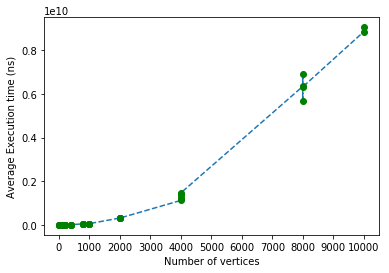

In [ ]:
import matplotlib.pyplot as plt 
repeated_results = sorted(repeated_results,key=lambda repeated_results: repeated_results[0]) #plot the result here
print(repeated_results)
x_val = [x[0] for x in repeated_results]
y_val = [x[1] for x in repeated_results]
plt.locator_params('x',nbins = 20)
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Average Execution time (ns)")
plt.xlabel("Number of vertices")
plt.show()

# Parse input

In [2]:
def parse_input_file_kruskal(file_address):
    # store vertices and edges in separate sets
    vertices = set()
    edges = [] 
    # read file
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    # populate sets
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((x[0], x[1], int(x[2])))
    vertices = list(vertices)
    return vertices, edges, num_V_E

In [3]:
graphs_kruskal = []
for file in tqdm_notebook(os.listdir()):
    vertices, edges, num_V_E = parse_input_file_kruskal(file) 
    graphs_kruskal.append((num_V_E, vertices, edges))

  0%|          | 0/68 [00:00<?, ?it/s]

In [4]:
# Graph object
class Graph:
    def __init__(self, V, E, num_V, num_E):
        self.V = V
        self.E = E
        self.num_V = num_V
        self.num_E = num_E

# Kruskal Efficient

In [14]:
class Kruskal_Efficient:
    
    def __init__(self, graph):
        self.graph = graph
        self.sets = {} # set of vertices
        self.MST = [] # Minimum Spanning Tree
    
    
    # make a set of vertices
    def make_sets(self):
        for v in self.graph.V:
            self.sets[v] = [v]
        
    
    # union the subsets which the vertices are not in the same sets
    def union(self, u_prnt, v_prnt):
        # get the size of two elements and append the vertices to the bigger one
        if (len(self.sets.get(u_prnt)) >= len(self.sets.get(v_prnt))):
            self.sets[u_prnt].extend(self.sets[v_prnt])
            self.sets.pop(v_prnt)
        # append the list of vertices of parent u to v
        else:
            self.sets[v_prnt].extend(self.sets[u_prnt])
            self.sets.pop(u_prnt)
    
    
    
    # find the parent of u and v vertices and return the parents
    def find_parent(self, u, v, items):
        u_key = v_key = 0
        for item in list(items):
            # item[0] is the key in dictionary
            # item[1] is the values in the dictionary
            key, value = item[0], item[1]
            # check the vertices in the value list and return the key as the parent of the vertex
            if u in value:
                u_key = item[0]
            if v in value:
                v_key = item[0]
            if u_key and v_key:
                break
        return (u_key, v_key)
    
    
    
    # make the MST tree
    def execute(self):      
        # sorting the edges based on the wight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])
        self.make_sets() # make a set of vertices
        # make a list of sets of key and value pairs to iterate through them
        items = self.sets.items()
        for e in E:
            # check if number of edges in MST are less than  nodes are 
            if((len(self.MST)+1) <  int(self.graph.num_E)):
                u, v, w = e
                u_parent, v_parent = self.find_parent(u, v, items)
                # if the vertices(u,v) are not in the same sets
                if (u_parent != v_parent):
                    self.union(u_parent, v_parent)
                    # add the edge to the MST[]
                    self.MST.append(e)
            # if the MST is completed, stop looping through the edges
            else:
                break

        return self.MST

    
    # calculate the final weight of the MST
    def MSTweight_EK(self):
        sum = 0
        for (u ,v, w) in self.MST:
            sum = sum + w
        return sum

In [15]:
def get_time_kruskal(vertices, edges, num_V_E):
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1]) # initialize graph
    algo = Kruskal_Efficient(graph) # initialize algorithm object
    gc.disable() # disable garbage collector
    start_time = perf_counter_ns()
    result = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    print("The Weight of MST is: ", algo.MSTweight_EK())
    return (end_time-start_time)

In [20]:
results_k_efficient = []
# with a progress bar, execute the algorithm
for i in tqdm_notebook(range(len(graphs_kruskal))):
    print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_efficient.append((graphs_kruskal[i][0][0], get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

  0%|          | 0/68 [00:00<?, ?it/s]

|V| =  10  |E| =  9
Running Time was:  123600
The Weight of MST is:  19618
|V| =  10  |E| =  11
Running Time was:  140300
The Weight of MST is:  16940
|V| =  10  |E| =  13
Running Time was:  118400
The Weight of MST is:  -44448
|V| =  10  |E| =  10
Running Time was:  97600
The Weight of MST is:  25217
|V| =  20  |E| =  24
Running Time was:  262300
The Weight of MST is:  -32021
|V| =  20  |E| =  24
Running Time was:  157200
The Weight of MST is:  25130
|V| =  20  |E| =  28
Running Time was:  411500
The Weight of MST is:  -41693
|V| =  20  |E| =  26
Running Time was:  411800
The Weight of MST is:  -37205
|V| =  40  |E| =  56
Running Time was:  863800
The Weight of MST is:  -114203
|V| =  40  |E| =  50
Running Time was:  680500
The Weight of MST is:  -31929
|V| =  40  |E| =  50
Running Time was:  769100
The Weight of MST is:  -79570
|V| =  40  |E| =  52
Running Time was:  394400
The Weight of MST is:  -79741
|V| =  80  |E| =  108
Running Time was:  1516300
The Weight of MST is:  -139926
|

## Repeated runs for the first 50 graphs:

In [16]:
repeated_results = []
for i in tqdm_notebook(range(0,50)):
    temp_results = []
    for j in range(0,1000):
        print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
        temp_results.append(get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2],graphs_kruskal[i][0]))
    repeated_results.append((graphs_kruskal[i][0][0], sum(temp_results)/len(temp_results)))
repeated_results

  0%|          | 0/50 [00:00<?, ?it/s]

Running Time was:  122200
The Weight of MST is:  19618
Running Time was:  115300
The Weight of MST is:  19618
Running Time was:  109600
The Weight of MST is:  19618
Running Time was:  104700
The Weight of MST is:  19618
Running Time was:  119900
The Weight of MST is:  19618
Running Time was:  123900
The Weight of MST is:  19618
Running Time was:  116900
The Weight of MST is:  19618
Running Time was:  99100
The Weight of MST is:  19618
Running Time was:  115700
The Weight of MST is:  19618
Running Time was:  116700
The Weight of MST is:  19618
Running Time was:  122100
The Weight of MST is:  19618
Running Time was:  117100
The Weight of MST is:  19618
Running Time was:  116400
The Weight of MST is:  19618
Running Time was:  118600
The Weight of MST is:  19618
Running Time was:  126100
The Weight of MST is:  19618
Running Time was:  122700
The Weight of MST is:  19618
Running Time was:  128500
The Weight of MST is:  19618
Running Time was:  107700
The Weight of MST is:  19618
Running Tim

The Weight of MST is:  16940
Running Time was:  70200
The Weight of MST is:  16940
Running Time was:  61800
The Weight of MST is:  16940
Running Time was:  60000
The Weight of MST is:  16940
Running Time was:  59700
The Weight of MST is:  16940
Running Time was:  59900
The Weight of MST is:  16940
Running Time was:  58800
The Weight of MST is:  16940
Running Time was:  58000
The Weight of MST is:  16940
Running Time was:  58600
The Weight of MST is:  16940
Running Time was:  68400
The Weight of MST is:  -44448
Running Time was:  63800
The Weight of MST is:  -44448
Running Time was:  54700
The Weight of MST is:  -44448
Running Time was:  52600
The Weight of MST is:  -44448
Running Time was:  63300
The Weight of MST is:  -44448
Running Time was:  63500
The Weight of MST is:  -44448
Running Time was:  59500
The Weight of MST is:  -44448
Running Time was:  53100
The Weight of MST is:  -44448
Running Time was:  51000
The Weight of MST is:  -44448
Running Time was:  61800
The Weight of MST i

The Weight of MST is:  25217
Running Time was:  76800
The Weight of MST is:  25217
Running Time was:  52800
The Weight of MST is:  25217
Running Time was:  53100
The Weight of MST is:  25217
Running Time was:  48400
The Weight of MST is:  25217
Running Time was:  43100
The Weight of MST is:  25217
Running Time was:  41900
The Weight of MST is:  25217
Running Time was:  41500
The Weight of MST is:  25217
Running Time was:  41400
The Weight of MST is:  25217
Running Time was:  42300
The Weight of MST is:  25217
Running Time was:  41600
The Weight of MST is:  25217
Running Time was:  41100
The Weight of MST is:  25217
Running Time was:  41300
The Weight of MST is:  25217
Running Time was:  41300
The Weight of MST is:  25217
Running Time was:  125500
The Weight of MST is:  25217
Running Time was:  86200
The Weight of MST is:  25217
Running Time was:  95500
The Weight of MST is:  25217
Running Time was:  63500
The Weight of MST is:  25217
Running Time was:  55500
The Weight of MST is:  2521

Running Time was:  324300
The Weight of MST is:  25130
Running Time was:  248900
The Weight of MST is:  25130
Running Time was:  134700
The Weight of MST is:  25130
Running Time was:  182000
The Weight of MST is:  25130
Running Time was:  126500
The Weight of MST is:  25130
Running Time was:  122100
The Weight of MST is:  25130
Running Time was:  130900
The Weight of MST is:  25130
Running Time was:  120900
The Weight of MST is:  25130
Running Time was:  120600
The Weight of MST is:  25130
Running Time was:  118700
The Weight of MST is:  25130
Running Time was:  129700
The Weight of MST is:  25130
Running Time was:  127300
The Weight of MST is:  25130
Running Time was:  390200
The Weight of MST is:  25130
Running Time was:  176000
The Weight of MST is:  25130
Running Time was:  147700
The Weight of MST is:  25130
Running Time was:  145500
The Weight of MST is:  25130
Running Time was:  145800
The Weight of MST is:  25130
Running Time was:  143600
The Weight of MST is:  25130
Running Ti

Running Time was:  383800
The Weight of MST is:  -114203
Running Time was:  355800
The Weight of MST is:  -114203
Running Time was:  365100
The Weight of MST is:  -114203
Running Time was:  345800
The Weight of MST is:  -114203
Running Time was:  344600
The Weight of MST is:  -114203
Running Time was:  922200
The Weight of MST is:  -114203
Running Time was:  1203500
The Weight of MST is:  -31929
Running Time was:  2115700
The Weight of MST is:  -31929
Running Time was:  2889800
The Weight of MST is:  -31929
Running Time was:  674600
The Weight of MST is:  -31929
Running Time was:  712500
The Weight of MST is:  -31929
Running Time was:  666100
The Weight of MST is:  -31929
Running Time was:  1059500
The Weight of MST is:  -31929
Running Time was:  1098000
The Weight of MST is:  -31929
Running Time was:  873700
The Weight of MST is:  -31929
Running Time was:  1993400
The Weight of MST is:  -31929
Running Time was:  826300
The Weight of MST is:  -31929
Running Time was:  507300
The Weight

Running Time was:  318000
The Weight of MST is:  -79570
Running Time was:  1155100
The Weight of MST is:  -79570
Running Time was:  934000
The Weight of MST is:  -79570
Running Time was:  919600
The Weight of MST is:  -79570
Running Time was:  863000
The Weight of MST is:  -79570
Running Time was:  825200
The Weight of MST is:  -79570
Running Time was:  935800
The Weight of MST is:  -79570
Running Time was:  1003200
The Weight of MST is:  -79570
Running Time was:  1063500
The Weight of MST is:  -79570
Running Time was:  1075000
The Weight of MST is:  -79570
Running Time was:  1403000
The Weight of MST is:  -79570
Running Time was:  850600
The Weight of MST is:  -79570
Running Time was:  961300
The Weight of MST is:  -79570
Running Time was:  1288400
The Weight of MST is:  -79570
Running Time was:  1014300
The Weight of MST is:  -79570
Running Time was:  394700
The Weight of MST is:  -79570
Running Time was:  1045700
The Weight of MST is:  -79570
Running Time was:  1142300
The Weight of

The Weight of MST is:  -198094
Running Time was:  1244400
The Weight of MST is:  -198094
Running Time was:  1126400
The Weight of MST is:  -198094
Running Time was:  1222000
The Weight of MST is:  -198094
Running Time was:  1216900
The Weight of MST is:  -198094
Running Time was:  1910700
The Weight of MST is:  -198094
Running Time was:  1225700
The Weight of MST is:  -198094
Running Time was:  1292100
The Weight of MST is:  -198094
Running Time was:  1232900
The Weight of MST is:  -198094
Running Time was:  1226800
The Weight of MST is:  -198094
Running Time was:  1207600
The Weight of MST is:  -198094
Running Time was:  1201400
The Weight of MST is:  -198094
Running Time was:  1195400
The Weight of MST is:  -198094
Running Time was:  1198600
The Weight of MST is:  -198094
Running Time was:  1197100
The Weight of MST is:  -198094
Running Time was:  1202200
The Weight of MST is:  -198094
Running Time was:  1140800
The Weight of MST is:  -198094
Running Time was:  1065200
The Weight of 

The Weight of MST is:  -233320
Running Time was:  1130500
The Weight of MST is:  -233320
Running Time was:  1536500
The Weight of MST is:  -233320
Running Time was:  1069100
The Weight of MST is:  -233320
Running Time was:  1050100
The Weight of MST is:  -233320
Running Time was:  1047100
The Weight of MST is:  -233320
Running Time was:  1193800
The Weight of MST is:  -233320
Running Time was:  1183600
The Weight of MST is:  -233320
Running Time was:  1174100
The Weight of MST is:  -233320
Running Time was:  1167100
The Weight of MST is:  -233320
Running Time was:  1170800
The Weight of MST is:  -233320
Running Time was:  1186800
The Weight of MST is:  -233320
Running Time was:  1169500
The Weight of MST is:  -233320
Running Time was:  1182800
The Weight of MST is:  -233320
Running Time was:  2365800
The Weight of MST is:  -233320
Running Time was:  1743800
The Weight of MST is:  -233320
Running Time was:  2714700
The Weight of MST is:  -233320
Running Time was:  1226200
The Weight of 

Running Time was:  1529200
The Weight of MST is:  -288906
Running Time was:  1744000
The Weight of MST is:  -288906
Running Time was:  1721000
The Weight of MST is:  -288906
Running Time was:  1697900
The Weight of MST is:  -288906
Running Time was:  1698200
The Weight of MST is:  -288906
Running Time was:  1699700
The Weight of MST is:  -288906
Running Time was:  1715600
The Weight of MST is:  -288906
Running Time was:  2416700
The Weight of MST is:  -288906
Running Time was:  1572700
The Weight of MST is:  -288906
Running Time was:  1560100
The Weight of MST is:  -288906
Running Time was:  1543800
The Weight of MST is:  -288906
Running Time was:  1544200
The Weight of MST is:  -288906
Running Time was:  1554400
The Weight of MST is:  -288906
Running Time was:  1565500
The Weight of MST is:  -288906
Running Time was:  1778600
The Weight of MST is:  -288906
Running Time was:  1863500
The Weight of MST is:  -288906
Running Time was:  1560500
The Weight of MST is:  -288906
Running Time w

Running Time was:  5524300
The Weight of MST is:  -510185
Running Time was:  6340200
The Weight of MST is:  -510185
Running Time was:  6598700
The Weight of MST is:  -510185
Running Time was:  5543500
The Weight of MST is:  -510185
Running Time was:  5507900
The Weight of MST is:  -510185
Running Time was:  6476300
The Weight of MST is:  -510185
Running Time was:  5525900
The Weight of MST is:  -510185
Running Time was:  5854900
The Weight of MST is:  -510185
Running Time was:  5712200
The Weight of MST is:  -510185
Running Time was:  5530100
The Weight of MST is:  -510185
Running Time was:  8030700
The Weight of MST is:  -510185
Running Time was:  5589900
The Weight of MST is:  -510185
Running Time was:  5817700
The Weight of MST is:  -510185
Running Time was:  5802600
The Weight of MST is:  -510185
Running Time was:  5548000
The Weight of MST is:  -510185
Running Time was:  6371700
The Weight of MST is:  -510185
Running Time was:  6160100
The Weight of MST is:  -510185
Running Time w

Running Time was:  8712900
The Weight of MST is:  -444357
Running Time was:  13070800
The Weight of MST is:  -444357
Running Time was:  5687400
The Weight of MST is:  -444357
Running Time was:  5244600
The Weight of MST is:  -444357
Running Time was:  5974800
The Weight of MST is:  -444357
Running Time was:  5285800
The Weight of MST is:  -444357
Running Time was:  5232700
The Weight of MST is:  -444357
Running Time was:  12726800
The Weight of MST is:  -444357
Running Time was:  9705600
The Weight of MST is:  -444357
Running Time was:  12513300
The Weight of MST is:  -444357
Running Time was:  6939300
The Weight of MST is:  -444357
Running Time was:  5806300
The Weight of MST is:  -444357
Running Time was:  8025000
The Weight of MST is:  -444357
Running Time was:  11738400
The Weight of MST is:  -444357
Running Time was:  8467800
The Weight of MST is:  -444357
Running Time was:  5274000
The Weight of MST is:  -444357
Running Time was:  5842300
The Weight of MST is:  -444357
Running Ti

Running Time was:  32259700
The Weight of MST is:  -1119906
Running Time was:  24793600
The Weight of MST is:  -1119906
Running Time was:  22115500
The Weight of MST is:  -1119906
Running Time was:  65824900
The Weight of MST is:  -1119906
Running Time was:  35883700
The Weight of MST is:  -1119906
Running Time was:  22650300
The Weight of MST is:  -1119906
Running Time was:  21968100
The Weight of MST is:  -1119906
Running Time was:  23756000
The Weight of MST is:  -1119906
Running Time was:  24627800
The Weight of MST is:  -1119906
Running Time was:  22308400
The Weight of MST is:  -1119906
Running Time was:  22555300
The Weight of MST is:  -1119906
Running Time was:  24207400
The Weight of MST is:  -1119906
Running Time was:  22353200
The Weight of MST is:  -1119906
Running Time was:  23269900
The Weight of MST is:  -1119906
Running Time was:  28164500
The Weight of MST is:  -1119906
Running Time was:  24894300
The Weight of MST is:  -1119906
Running Time was:  23066500
The Weight o

Running Time was:  23755500
The Weight of MST is:  -788168
Running Time was:  23607700
The Weight of MST is:  -788168
Running Time was:  26674500
The Weight of MST is:  -788168
Running Time was:  20373600
The Weight of MST is:  -788168
Running Time was:  20531400
The Weight of MST is:  -788168
Running Time was:  28802800
The Weight of MST is:  -788168
Running Time was:  22763100
The Weight of MST is:  -788168
Running Time was:  22191900
The Weight of MST is:  -788168
Running Time was:  27126500
The Weight of MST is:  -788168
Running Time was:  29927300
The Weight of MST is:  -788168
Running Time was:  27424900
The Weight of MST is:  -788168
Running Time was:  20630600
The Weight of MST is:  -788168
Running Time was:  22807500
The Weight of MST is:  -788168
Running Time was:  28856400
The Weight of MST is:  -788168
Running Time was:  24424800
The Weight of MST is:  -788168
Running Time was:  33699900
The Weight of MST is:  -788168
Running Time was:  24030400
The Weight of MST is:  -7881

Running Time was:  59267400
The Weight of MST is:  -733645
Running Time was:  67958700
The Weight of MST is:  -733645
Running Time was:  54585500
The Weight of MST is:  -733645
Running Time was:  31206600
The Weight of MST is:  -733645
Running Time was:  27263600
The Weight of MST is:  -733645
Running Time was:  23442900
The Weight of MST is:  -733645
Running Time was:  22928200
The Weight of MST is:  -733645
Running Time was:  21582800
The Weight of MST is:  -733645
Running Time was:  22817700
The Weight of MST is:  -733645
Running Time was:  22131800
The Weight of MST is:  -733645
Running Time was:  22448000
The Weight of MST is:  -733645
Running Time was:  22705100
The Weight of MST is:  -733645
Running Time was:  22092200
The Weight of MST is:  -733645
Running Time was:  29778000
The Weight of MST is:  -733645
Running Time was:  23702100
The Weight of MST is:  -733645
Running Time was:  33183900
The Weight of MST is:  -733645
Running Time was:  33294100
The Weight of MST is:  -7336

Running Time was:  157528200
The Weight of MST is:  -1541291
Running Time was:  94621700
The Weight of MST is:  -1541291
Running Time was:  89951200
The Weight of MST is:  -1541291
Running Time was:  84892800
The Weight of MST is:  -1541291
Running Time was:  97151800
The Weight of MST is:  -1541291
Running Time was:  85560700
The Weight of MST is:  -1541291
Running Time was:  99328700
The Weight of MST is:  -1541291
Running Time was:  104276000
The Weight of MST is:  -1541291
Running Time was:  114352900
The Weight of MST is:  -1541291
Running Time was:  144471700
The Weight of MST is:  -1541291
Running Time was:  124000200
The Weight of MST is:  -1541291
Running Time was:  181897600
The Weight of MST is:  -1541291
Running Time was:  162685100
The Weight of MST is:  -1541291
Running Time was:  111952800
The Weight of MST is:  -1541291
Running Time was:  108147900
The Weight of MST is:  -1541291
Running Time was:  117015000
The Weight of MST is:  -1541291
Running Time was:  145397800
T

Running Time was:  125093400
The Weight of MST is:  -1578294
Running Time was:  89654600
The Weight of MST is:  -1578294
Running Time was:  115259000
The Weight of MST is:  -1578294
Running Time was:  107536100
The Weight of MST is:  -1578294
Running Time was:  104872800
The Weight of MST is:  -1578294
Running Time was:  126386500
The Weight of MST is:  -1578294
Running Time was:  122798700
The Weight of MST is:  -1578294
Running Time was:  109052800
The Weight of MST is:  -1578294
Running Time was:  97723200
The Weight of MST is:  -1578294
Running Time was:  98158900
The Weight of MST is:  -1578294
Running Time was:  103703000
The Weight of MST is:  -1578294
Running Time was:  107206200
The Weight of MST is:  -1578294
Running Time was:  98938000
The Weight of MST is:  -1578294
Running Time was:  101030900
The Weight of MST is:  -1578294
Running Time was:  82603300
The Weight of MST is:  -1664316
Running Time was:  91958500
The Weight of MST is:  -1664316
Running Time was:  102568900
T

Running Time was:  92129200
The Weight of MST is:  -1652119
Running Time was:  84628100
The Weight of MST is:  -1652119
Running Time was:  97698700
The Weight of MST is:  -1652119
Running Time was:  98055800
The Weight of MST is:  -1652119
Running Time was:  96163900
The Weight of MST is:  -1652119
Running Time was:  103424700
The Weight of MST is:  -1652119
Running Time was:  93589000
The Weight of MST is:  -1652119
Running Time was:  95235300
The Weight of MST is:  -1652119
Running Time was:  97770800
The Weight of MST is:  -1652119
Running Time was:  92776200
The Weight of MST is:  -1652119
Running Time was:  90217100
The Weight of MST is:  -1652119
Running Time was:  94001600
The Weight of MST is:  -1652119
Running Time was:  98144100
The Weight of MST is:  -1652119
Running Time was:  84983300
The Weight of MST is:  -1652119
Running Time was:  88934500
The Weight of MST is:  -1652119
Running Time was:  86171500
The Weight of MST is:  -1652119
Running Time was:  94365200
The Weight 

Running Time was:  146395800
The Weight of MST is:  -2089013
Running Time was:  155574700
The Weight of MST is:  -2089013
Running Time was:  157498100
The Weight of MST is:  -2089013
Running Time was:  140169000
The Weight of MST is:  -2089013
Running Time was:  138477500
The Weight of MST is:  -2089013
Running Time was:  130292400
The Weight of MST is:  -2089013
Running Time was:  132042700
The Weight of MST is:  -2089013
Running Time was:  145956800
The Weight of MST is:  -2089013
Running Time was:  138455200
The Weight of MST is:  -2089013
Running Time was:  143972000
The Weight of MST is:  -2089013
Running Time was:  145056900
The Weight of MST is:  -2089013
Running Time was:  131313300
The Weight of MST is:  -2089013
Running Time was:  136400000
The Weight of MST is:  -2089013
Running Time was:  136203800
The Weight of MST is:  -2089013
Running Time was:  136250800
The Weight of MST is:  -2089013
Running Time was:  150792600
The Weight of MST is:  -2089013
Running Time was:  13983

Running Time was:  149112400
The Weight of MST is:  -2229428
Running Time was:  149108500
The Weight of MST is:  -2229428
Running Time was:  132930400
The Weight of MST is:  -2229428
Running Time was:  156722200
The Weight of MST is:  -2229428
Running Time was:  142678100
The Weight of MST is:  -2229428
Running Time was:  137922400
The Weight of MST is:  -2229428
Running Time was:  137423300
The Weight of MST is:  -2229428
Running Time was:  145177400
The Weight of MST is:  -2229428
Running Time was:  144073000
The Weight of MST is:  -2229428
Running Time was:  149803900
The Weight of MST is:  -2229428
Running Time was:  136521900
The Weight of MST is:  -2229428
Running Time was:  150212000
The Weight of MST is:  -2229428
Running Time was:  142041600
The Weight of MST is:  -2229428
Running Time was:  158997100
The Weight of MST is:  -2229428
Running Time was:  138692800
The Weight of MST is:  -2229428
Running Time was:  147805100
The Weight of MST is:  -2229428
Running Time was:  16592

Running Time was:  150144300
The Weight of MST is:  -2356163
Running Time was:  140364500
The Weight of MST is:  -2356163
Running Time was:  137745800
The Weight of MST is:  -2356163
Running Time was:  158198500
The Weight of MST is:  -2356163
Running Time was:  134527500
The Weight of MST is:  -2356163
Running Time was:  149936700
The Weight of MST is:  -2356163
Running Time was:  154254500
The Weight of MST is:  -2356163
Running Time was:  135808300
The Weight of MST is:  -2356163
Running Time was:  139636200
The Weight of MST is:  -2356163
Running Time was:  145524400
The Weight of MST is:  -2356163
Running Time was:  137450500
The Weight of MST is:  -2356163
Running Time was:  160387300
The Weight of MST is:  -2356163
Running Time was:  147114200
The Weight of MST is:  -2356163
Running Time was:  154157100
The Weight of MST is:  -2356163
Running Time was:  151453500
The Weight of MST is:  -2356163
Running Time was:  151668300
The Weight of MST is:  -2356163
Running Time was:  14003

Running Time was:  575312800
The Weight of MST is:  -4739387
Running Time was:  673431100
The Weight of MST is:  -4739387
Running Time was:  568498000
The Weight of MST is:  -4739387
Running Time was:  616177800
The Weight of MST is:  -4739387
Running Time was:  647129400
The Weight of MST is:  -4739387
Running Time was:  627773200
The Weight of MST is:  -4739387
Running Time was:  576002800
The Weight of MST is:  -4739387
Running Time was:  618714300
The Weight of MST is:  -4739387
Running Time was:  598417300
The Weight of MST is:  -4739387
Running Time was:  672254200
The Weight of MST is:  -4739387
Running Time was:  596843100
The Weight of MST is:  -4739387
Running Time was:  586454800
The Weight of MST is:  -4739387
Running Time was:  583995300
The Weight of MST is:  -4739387
Running Time was:  604039800
The Weight of MST is:  -4739387
Running Time was:  601744100
The Weight of MST is:  -4739387
Running Time was:  611706200
The Weight of MST is:  -4739387
Running Time was:  59582

Running Time was:  745039000
The Weight of MST is:  -4717250
Running Time was:  623169600
The Weight of MST is:  -4717250
Running Time was:  574838500
The Weight of MST is:  -4717250
Running Time was:  621438800
The Weight of MST is:  -4717250
Running Time was:  565059000
The Weight of MST is:  -4717250
Running Time was:  649290200
The Weight of MST is:  -4717250
Running Time was:  600056800
The Weight of MST is:  -4717250
Running Time was:  576038800
The Weight of MST is:  -4717250
Running Time was:  652160800
The Weight of MST is:  -4717250
Running Time was:  567717300
The Weight of MST is:  -4717250
Running Time was:  617779900
The Weight of MST is:  -4717250
Running Time was:  617416000
The Weight of MST is:  -4717250
Running Time was:  582420000
The Weight of MST is:  -4717250
Running Time was:  604771900
The Weight of MST is:  -4717250
Running Time was:  572653900
The Weight of MST is:  -4717250
Running Time was:  591454000
The Weight of MST is:  -4717250
Running Time was:  58630

Running Time was:  580719900
The Weight of MST is:  -4537267
Running Time was:  566363600
The Weight of MST is:  -4537267
Running Time was:  652681500
The Weight of MST is:  -4537267
Running Time was:  570286700
The Weight of MST is:  -4537267
Running Time was:  594908600
The Weight of MST is:  -4537267
Running Time was:  582464600
The Weight of MST is:  -4537267
Running Time was:  606179100
The Weight of MST is:  -4537267
Running Time was:  616158700
The Weight of MST is:  -4537267
Running Time was:  579365000
The Weight of MST is:  -4537267
Running Time was:  611966600
The Weight of MST is:  -4537267
Running Time was:  614290900
The Weight of MST is:  -4537267
Running Time was:  609857900
The Weight of MST is:  -4537267
Running Time was:  583294300
The Weight of MST is:  -4537267
Running Time was:  609185200
The Weight of MST is:  -4537267
Running Time was:  602849200
The Weight of MST is:  -4537267
Running Time was:  584976000
The Weight of MST is:  -4537267
Running Time was:  56129

Running Time was:  2434367300
The Weight of MST is:  -9314968
Running Time was:  2438633100
The Weight of MST is:  -9314968
Running Time was:  2383759900
The Weight of MST is:  -9314968
Running Time was:  2416974700
The Weight of MST is:  -9314968
Running Time was:  2471563300
The Weight of MST is:  -9314968
Running Time was:  2438017700
The Weight of MST is:  -9314968
Running Time was:  2392143600
The Weight of MST is:  -9314968
Running Time was:  2569359900
The Weight of MST is:  -9314968
Running Time was:  2754704200
The Weight of MST is:  -9314968
Running Time was:  2639850900
The Weight of MST is:  -9314968
Running Time was:  2790857900
The Weight of MST is:  -9314968
Running Time was:  2374994400
The Weight of MST is:  -9314968
Running Time was:  2512835000
The Weight of MST is:  -9314968
Running Time was:  2677633600
The Weight of MST is:  -9314968
Running Time was:  2834278400
The Weight of MST is:  -9314968
Running Time was:  2679790200
The Weight of MST is:  -9314968
Running 

Running Time was:  2363466000
The Weight of MST is:  -9845767
Running Time was:  2602119800
The Weight of MST is:  -9845767
Running Time was:  2540061200
The Weight of MST is:  -9845767
Running Time was:  2439574200
The Weight of MST is:  -9845767
Running Time was:  2490074600
The Weight of MST is:  -9845767
Running Time was:  2479286900
The Weight of MST is:  -9845767
Running Time was:  2499352200
The Weight of MST is:  -9845767
Running Time was:  2365433700
The Weight of MST is:  -9845767
Running Time was:  2427673300
The Weight of MST is:  -9845767
Running Time was:  2421507200
The Weight of MST is:  -9845767
Running Time was:  2449208500
The Weight of MST is:  -9845767
Running Time was:  2442481300
The Weight of MST is:  -9845767
Running Time was:  2444558500
The Weight of MST is:  -9845767
Running Time was:  2506769300
The Weight of MST is:  -9845767
Running Time was:  2510474900
The Weight of MST is:  -9845767
Running Time was:  2396389700
The Weight of MST is:  -9845767
Running 

Running Time was:  2547778600
The Weight of MST is:  -8681447
Running Time was:  2598755500
The Weight of MST is:  -8681447
Running Time was:  2587362000
The Weight of MST is:  -8681447
Running Time was:  2460502800
The Weight of MST is:  -8681447
Running Time was:  2471253500
The Weight of MST is:  -8681447
Running Time was:  2442701000
The Weight of MST is:  -8681447
Running Time was:  2410699600
The Weight of MST is:  -8681447
Running Time was:  2448390900
The Weight of MST is:  -8681447
Running Time was:  2385494000
The Weight of MST is:  -8681447
Running Time was:  2564719900
The Weight of MST is:  -8681447
Running Time was:  2490914900
The Weight of MST is:  -8681447
Running Time was:  2663940400
The Weight of MST is:  -8681447
Running Time was:  2675883100
The Weight of MST is:  -8681447
Running Time was:  2438730600
The Weight of MST is:  -8681447
Running Time was:  2558798300
The Weight of MST is:  -8681447
Running Time was:  2599264200
The Weight of MST is:  -8681447
Running 

Running Time was:  10431673500
The Weight of MST is:  -18798446
Running Time was:  10579381200
The Weight of MST is:  -18798446
Running Time was:  10656112000
The Weight of MST is:  -18798446
Running Time was:  10201448600
The Weight of MST is:  -18798446
Running Time was:  10409853900
The Weight of MST is:  -18798446
Running Time was:  10487780700
The Weight of MST is:  -18798446
Running Time was:  10306506800
The Weight of MST is:  -18798446
Running Time was:  10820684900
The Weight of MST is:  -18798446
Running Time was:  10724567600
The Weight of MST is:  -18798446
Running Time was:  10366604300
The Weight of MST is:  -18798446
Running Time was:  10506212500
The Weight of MST is:  -18798446
Running Time was:  10629767900
The Weight of MST is:  -18798446
Running Time was:  10105184000
The Weight of MST is:  -18798446
Running Time was:  10542033600
The Weight of MST is:  -18798446
Running Time was:  10691658900
The Weight of MST is:  -18798446
Running Time was:  10652546700
The Weigh

Running Time was:  10073495300
The Weight of MST is:  -18741474
Running Time was:  11007613000
The Weight of MST is:  -18741474
Running Time was:  11178842700
The Weight of MST is:  -18741474
Running Time was:  11098924200
The Weight of MST is:  -18741474
Running Time was:  11207570900
The Weight of MST is:  -18741474
Running Time was:  11047481600
The Weight of MST is:  -18741474
Running Time was:  11530662000
The Weight of MST is:  -18741474
Running Time was:  10975561000
The Weight of MST is:  -18741474
Running Time was:  11307067000
The Weight of MST is:  -18741474
Running Time was:  10913723100
The Weight of MST is:  -18741474
Running Time was:  11220017400
The Weight of MST is:  -18741474
Running Time was:  11147485600
The Weight of MST is:  -18741474
Running Time was:  11758815700
The Weight of MST is:  -18741474
Running Time was:  10778868600
The Weight of MST is:  -18741474
Running Time was:  10910664300
The Weight of MST is:  -18741474
Running Time was:  9900960400
The Weight

Running Time was:  10759646700
The Weight of MST is:  -18178610
Running Time was:  10470968500
The Weight of MST is:  -18178610
Running Time was:  10320647500
The Weight of MST is:  -18178610
Running Time was:  10173085600
The Weight of MST is:  -18178610
Running Time was:  10869277800
The Weight of MST is:  -18178610
Running Time was:  10513088000
The Weight of MST is:  -18178610
Running Time was:  10550234900
The Weight of MST is:  -18178610
Running Time was:  10449318800
The Weight of MST is:  -18178610
Running Time was:  10770054900
The Weight of MST is:  -18178610
Running Time was:  10523360800
The Weight of MST is:  -18178610
Running Time was:  10771746200
The Weight of MST is:  -18178610
Running Time was:  10495530300
The Weight of MST is:  -18178610
Running Time was:  10290761000
The Weight of MST is:  -18178610
Running Time was:  10759864500
The Weight of MST is:  -18178610
Running Time was:  10289026900
The Weight of MST is:  -18178610
Running Time was:  10638083400
The Weigh

Running Time was:  18676191500
The Weight of MST is:  -22079522
Running Time was:  18241824600
The Weight of MST is:  -22079522
Running Time was:  18726667900
The Weight of MST is:  -22079522
Running Time was:  18187111000
The Weight of MST is:  -22079522
Running Time was:  18833444600
The Weight of MST is:  -22079522
Running Time was:  19023565700
The Weight of MST is:  -22079522
Running Time was:  18316068600
The Weight of MST is:  -22079522
Running Time was:  19151899000
The Weight of MST is:  -22338561
Running Time was:  20173345200
The Weight of MST is:  -22338561
Running Time was:  18617609800
The Weight of MST is:  -22338561
Running Time was:  19052840000
The Weight of MST is:  -22338561
Running Time was:  19751505700
The Weight of MST is:  -22338561
Running Time was:  17758323500
The Weight of MST is:  -22338561
Running Time was:  19405050300
The Weight of MST is:  -22338561
Running Time was:  19215061400
The Weight of MST is:  -22338561
Running Time was:  20877766900
The Weigh

[(10, 113778.0),
 (10, 101647.0),
 (10, 91450.0),
 (10, 73995.0),
 (20, 219202.0),
 (20, 249286.0),
 (20, 165312.0),
 (20, 190588.0),
 (40, 495315.0),
 (40, 686954.0),
 (40, 692198.0),
 (40, 801212.0),
 (80, 1280226.0),
 (80, 1231307.0),
 (80, 1260750.0),
 (80, 1272413.0),
 (100, 1839751.0),
 (100, 1833197.0),
 (100, 1703281.0),
 (100, 1834423.0),
 (200, 6274789.0),
 (200, 6516327.0),
 (200, 6325751.0),
 (200, 6025481.0),
 (400, 29110894.0),
 (400, 29770498.0),
 (400, 27622322.0),
 (400, 28950997.0),
 (800, 103758099.0),
 (800, 111765949.0),
 (800, 93202857.0),
 (800, 93727322.0),
 (1000, 142394624.0),
 (1000, 146712615.0),
 (1000, 146818505.0),
 (1000, 143872493.0),
 (2000, 604318452.0),
 (2000, 633197415.0),
 (2000, 611280866.0),
 (2000, 607619187.0),
 (4000, 2505650400.0),
 (4000, 2582842374.0),
 (4000, 2478687591.0),
 (4000, 2533398209.0),
 (8000, 10288179995.0),
 (8000, 10593702757.0),
 (8000, 10725865539.0),
 (8000, 10695298000.0),
 (10000, 17632759317.0),
 (10000, 18818222402.0)

### Plotting the results:

[(10, 123600), (10, 140300), (10, 118400), (10, 97600), (20, 262300), (20, 157200), (20, 411500), (20, 411800), (40, 863800), (40, 680500), (40, 769100), (40, 394400), (80, 1516300), (80, 2543000), (80, 2102600), (80, 2779300), (100, 2803200), (100, 2498100), (100, 4310800), (100, 1902700), (200, 6203000), (200, 8503900), (200, 9586400), (200, 6814700), (400, 28436700), (400, 26761000), (400, 24963200), (400, 23946900), (800, 97288500), (800, 97037200), (800, 98355000), (800, 91786400), (1000, 144693000), (1000, 131158500), (1000, 144233300), (1000, 228029800), (2000, 1216595600), (2000, 629124200), (2000, 698520400), (2000, 692321200), (4000, 3243682800), (4000, 4238929100), (4000, 3260892300), (4000, 3679921500), (8000, 17991630800), (8000, 19312071900), (8000, 14946513200), (8000, 15995286500), (10000, 20194239200), (10000, 23098062800), (10000, 19421755100), (10000, 24461997100), (20000, 104352594700), (20000, 100763717600), (20000, 93858074100), (20000, 105518140400), (40000, 5192

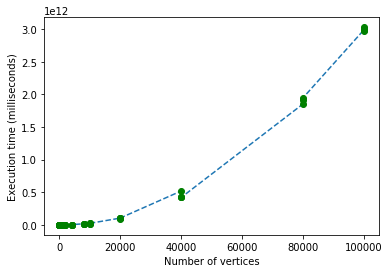

In [31]:
import matplotlib.pyplot as plt
results_k_efficient = sorted(results_k_efficient, key=lambda results: results[0])
x_val = [x[0] for x in results_k_efficient]
y_val = [x[1] for x in results_k_efficient]
print(results_k_efficient)
# build the plot
plt.plot(x_val,y_val,'--')
plt.locator_params('x',nbins = 10)
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

### Plotting the repeated results:

[(10, 113778.0), (10, 101647.0), (10, 91450.0), (10, 73995.0), (20, 219202.0), (20, 249286.0), (20, 165312.0), (20, 190588.0), (40, 495315.0), (40, 686954.0), (40, 692198.0), (40, 801212.0), (80, 1280226.0), (80, 1231307.0), (80, 1260750.0), (80, 1272413.0), (100, 1839751.0), (100, 1833197.0), (100, 1703281.0), (100, 1834423.0), (200, 6274789.0), (200, 6516327.0), (200, 6325751.0), (200, 6025481.0), (400, 29110894.0), (400, 29770498.0), (400, 27622322.0), (400, 28950997.0), (800, 103758099.0), (800, 111765949.0), (800, 93202857.0), (800, 93727322.0), (1000, 142394624.0), (1000, 146712615.0), (1000, 146818505.0), (1000, 143872493.0), (2000, 604318452.0), (2000, 633197415.0), (2000, 611280866.0), (2000, 607619187.0), (4000, 2505650400.0), (4000, 2582842374.0), (4000, 2478687591.0), (4000, 2533398209.0), (8000, 10288179995.0), (8000, 10593702757.0), (8000, 10725865539.0), (8000, 10695298000.0), (10000, 17632759317.0), (10000, 18818222402.0)]


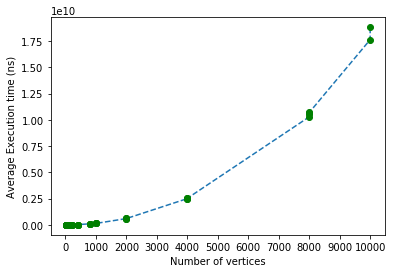

In [22]:
import matplotlib.pyplot as plt 
repeated_results = sorted(repeated_results,key=lambda repeated_results: repeated_results[0]) #plot the result here
print(repeated_results)
x_val = [x[0] for x in repeated_results]
y_val = [x[1] for x in repeated_results]
plt.locator_params('x',nbins = 20)
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Average Execution time (ns)")
plt.xlabel("Number of vertices")
plt.show()

# Kruskal Naive

In [5]:
class Kruskal_Naive:
    def __init__(self, graph):
        self.graph = graph
        self.adj_list = [] # adjacency list
        self.MST = [] # edges
        for v in range(self.graph.num_V):
            self.adj_list.append([0] * self.graph.num_V)

    def dfs_cycle(self, visited, v, parent): 
        # add vertice to visited
        visited.add(v)
        # check every edge
        for i in range(len(self.adj_list[v - 1])):
            # if it is an existing edge
            if self.adj_list[v - 1][i] == 1 or self.adj_list[i][v - 1] == 1:
                # if vertice is not a parent and in visited
                if i + 1 != parent and i + 1 in visited:
                    return True
                # if vertice is not a parent
                elif i + 1 != parent:            
                    self.dfs_cycle(visited, i + 1, v)
        return False
    
    def execute(self):
        # sorting based on the weight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])   
        # for each edge, check if it doesn't violate the invariant
        for e in E:
            # deconstruct the edge tuple 
            u, v, w = e
            u = int(u)
            v = int(v)
            # add target edge to adjacency list
            self.adj_list[u - 1][v - 1] = 1
            self.adj_list[v - 1][u - 1] = 1
            # create empty visited set
            visited = set()
            # check if there is cycle
            is_cycle = self.dfs_cycle(visited, u, -1)
            # if cycle, remove from adjacency list 
            if is_cycle:
                self.adj_list[u - 1][v - 1] = 0
                self.adj_list[v - 1][u - 1] = 0   
            # if not, add to final MST 
            else:
                self.MST.append(e)
        return self.MST


In [6]:
def get_time_naive_kruskal(vertices, edges, num_V_E):
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1]) # initialize graph
    algo = Kruskal_Naive(graph) # initialize algorithm object
    gc.disable() # disable garbage collector
    start_time = perf_counter_ns()
    full_edges  = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    #print(full_edges)
    print("Total weight: {}".format(sum([e[2] for e in full_edges])))
    return (end_time-start_time)

In [ ]:
results_k_naive = []
# with a progress bar, execute the algorithm
for i in tqdm_notebook(range(len(graphs_kruskal))):
    print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_naive.append((graphs_kruskal[i][0][0], get_time_naive_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

  0%|          | 0/68 [00:00<?, ?it/s]

|V| =  10  |E| =  9
Running Time was:  389900
Total weight: 29316
|V| =  10  |E| =  11
Running Time was:  707100
Total weight: 16940
|V| =  10  |E| =  13
Running Time was:  869400
Total weight: -44448
|V| =  10  |E| =  10
Running Time was:  710400
Total weight: 25217
|V| =  20  |E| =  24
Running Time was:  4415600
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2617900
Total weight: 25130
|V| =  20  |E| =  28
Running Time was:  4988700
Total weight: -41693
|V| =  20  |E| =  26
Running Time was:  2605400
Total weight: -37205
|V| =  40  |E| =  56
Running Time was:  17556400
Total weight: -114203
|V| =  40  |E| =  50
Running Time was:  9705700
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8899500
Total weight: -79570
|V| =  40  |E| =  52
Running Time was:  16983900
Total weight: -79741
|V| =  80  |E| =  108
Running Time was:  80207900
Total weight: -139926
|V| =  80  |E| =  99
Running Time was:  86174900
Total weight: -198094
|V| =  80  |E| =  104
Running Time 

[(10, 389900), (10, 707100), (10, 869400), (10, 710400), (20, 4415600), (20, 2617900), (20, 4988700), (20, 2605400), (40, 17556400), (40, 9705700), (40, 8899500), (40, 16983900), (80, 80207900), (80, 86174900), (80, 68498000), (80, 93556400), (100, 160848400), (100, 125719900), (100, 146410500), (100, 158002400), (200, 1371317000), (200, 1222143900), (200, 1266080600), (200, 1137027500), (400, 9892726900), (400, 8126470100), (400, 9435041500), (400, 10749349800), (800, 87455216100), (800, 83971985400), (800, 88539619900), (800, 80495933600), (1000, 154928314900), (1000, 173284610000), (1000, 168176827800), (1000, 167010259100), (2000, 1526225143000), (2000, 1406172042500), (2000, 1354044347900), (2000, 1483406294600), (4000, 11673397023300), (4000, 11879976526100), (4000, 11223371057900), (4000, 11661045994300), (8000, 92742803429500)]


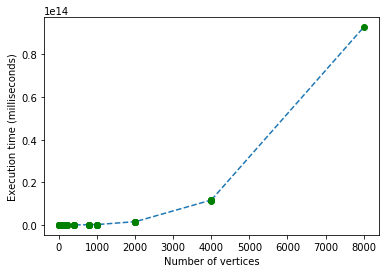

In [9]:
import matplotlib.pyplot as plt
results_k_naive = [(10, 389900), (10, 707100), (10, 869400), (10, 710400), (20, 4415600), (20, 2617900), (20, 4988700), (20, 2605400), (40, 17556400), (40, 9705700), (40, 8899500), (40, 16983900), (80, 80207900), (80, 86174900), (80, 68498000), (80, 93556400), (100, 160848400), (100, 125719900), (100, 146410500), (100, 158002400), (200, 1371317000), (200, 1222143900), (200, 1266080600), (200, 1137027500), (400, 9892726900), (400, 8126470100), (400, 9435041500), (400, 10749349800), (800, 87455216100), (800, 83971985400), (800, 88539619900), (800, 80495933600), (1000, 154928314900), (1000, 173284610000), (1000, 168176827800), (1000, 167010259100), (2000, 1526225143000), (2000, 1406172042500), (2000, 1354044347900), (2000, 1483406294600), (4000, 11673397023300), (4000, 11879976526100), (4000, 11223371057900), (4000, 11661045994300), (8000, 92742803429500)]
results_k_naive = sorted(results_k_naive, key=lambda results: results[0])
print(results_k_naive)
x_val = [x[0] for x in results_k_naive]
y_val = [x[1] for x in results_k_naive]

# build a plot
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

## Repeated runs for the first 20 graphs:

In [7]:
repeated_results_naive = []
for i in tqdm_notebook(range(0,20)):
    temp_results_naive = []
    for j in range(0,1000):
        print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
        temp_results_naive.append(get_time_naive_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2],graphs_kruskal[i][0]))
    repeated_results_naive.append((graphs_kruskal[i][0][0], sum(temp_results_naive)/len(temp_results_naive)))
repeated_results_naive

  0%|          | 0/20 [00:00<?, ?it/s]

|V| =  10  |E| =  9
Running Time was:  640000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  369600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  513200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  539100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  568000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  703400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  488800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  180400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  173500
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  510400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  528600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  526800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  534100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  635700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  343400
Total weight: 29316
|V| =  10 

Running Time was:  363400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  172600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  176000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  168100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  172200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  170000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  173800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  174300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  207600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  369100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  568700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  593500
Total weight: 29316
|V| =  10  |E| =  9
Running Ti

|V| =  10  |E| =  9
Running Time was:  203800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  195300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  197200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  329500
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  317700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  350100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  339100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  177600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  528300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  464800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  176800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  388600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  216100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  200000
Total weight: 29316
|V| =  10 

|V| =  10  |E| =  9
Running Time was:  180800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  165600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  165200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  205500
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  194400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  203300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  167100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  165700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  205100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  168900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  164900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  169900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  164700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  164200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  163900
Total weight: 29316
|V| =  10 

|V| =  10  |E| =  9
Running Time was:  202500
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  172900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  223500
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  636800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  176700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  337100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  170600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  170700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  192000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  170300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  174700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171400
Total weight: 29316
|V| =  10 

|V| =  10  |E| =  9
Running Time was:  613700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  179600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  176600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  170000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  176900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  184100
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  175800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  171200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  175300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  247300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  188800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  170300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  176400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  179600
Total weight: 29316
|V| =  10 

|V| =  10  |E| =  9
Running Time was:  213900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  200300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  198700
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  201600
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  198900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  192400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  208200
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  172900
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  205300
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  204000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  167400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  209000
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  199800
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  196400
Total weight: 29316
|V| =  10  |E| =  9
Running Time was:  193400
Total weight: 29316
|V| =  10 

Running Time was:  237300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  278200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  662300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  269800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  230700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  219800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  238200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  264700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  269600
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  246600
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  225500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  219400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  268300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  261400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  227400
Total weight: 16940
|V| =  10  |E| =

Running Time was:  269200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  591600
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  275300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  227300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  225000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  223400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  269400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  487200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  243100
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  225400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  224700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  229700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  225400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  311100
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  271600
Total weight: 16940
|V| =  10  |E| =

|V| =  10  |E| =  11
Running Time was:  270700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  345800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  233700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  269000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  232300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  220900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  223100
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  266300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  248800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  399000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  364900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  232900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  225800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  266300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  265200
Total weight: 1

|V| =  10  |E| =  11
Running Time was:  234700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  220500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  229200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  265800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  272900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  259200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  248500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  325600
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  269000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  661900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  267500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  268300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  265600
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  223300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  228400
Total weight: 1

Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  238500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  239300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  223500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  229000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  220500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  224100
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  228300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  277900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  267000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  631000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  228300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  227800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  282200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  327900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  26

Running Time was:  442700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  244400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  266600
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  234400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  424900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  345800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  267300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  272300
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  256800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  284700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  266600
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  272900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  255200
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  285900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  260600
Total weight: 16940
|V| =  10  |E| =

|V| =  10  |E| =  11
Running Time was:  652400
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  225500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  224900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  224500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  244900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  224700
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  224500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  268800
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  259000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  268000
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  269900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  266900
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  262500
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  268100
Total weight: 16940
|V| =  10  |E| =  11
Running Time was:  263300
Total weight: 1

|V| =  10  |E| =  13
Running Time was:  323300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  299500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  318700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  299500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  304100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  314200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  306700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  318300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  352600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  311200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  319100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  319600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  304600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  260100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  263300
T

Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  320700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  314900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  310500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  309900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  259000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255800
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  258600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  254200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  260300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  254900
Total weight: -44448
|V| =  10  |E| =  13
Runnin

Running Time was:  253700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  312900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  310800
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  259900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  358200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  267000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  310300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  269700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255800
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  256800
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  260300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  307200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  310300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  316100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  299600
Total weight: -44448
|

|V| =  10  |E| =  13
Running Time was:  276300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  257600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  263700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255800
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  256000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  256500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  258200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255400
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  261500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  628300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  372400
T

|V| =  10  |E| =  13
Running Time was:  275400
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  265100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  268600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  269800
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  275500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  803600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  283900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  276100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  276600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  269900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  275100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  276000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  304200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  268600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  280000
T

|V| =  10  |E| =  13
Running Time was:  309700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  267100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  257600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  256900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  256400
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  315600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  269300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  257000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  257100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  330500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  318200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  302600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  268500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  321500
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  314600
T

Running Time was:  318700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  273600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  257100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  269300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  307700
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  515200
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  271100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  256400
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  254000
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  267600
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  254900
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  296800
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  258300
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  258100
Total weight: -44448
|V| =  10  |E| =  13
Running Time was:  255700
Total weight: -44448
|

|V| =  10  |E| =  10
Running Time was:  854300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  680700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  657500
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  670400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  228300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  233300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  441900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  239600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  221400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  227500
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  225900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  225900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  220500
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  233600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  220100
Total weight: 2

|V| =  10  |E| =  10
Running Time was:  272800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  265100
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  266600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  256300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  226100
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  263400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  260000
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  226800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  224200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  266300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  259000
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  272000
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  232800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  231300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  258800
Total weight: 2

Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  277300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  272600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  272900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  224700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  272000
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  267100
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  265500
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  490400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  300500
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  470700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  360700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  660400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  268600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  251700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  22

Running Time was:  269300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  280000
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  275500
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  269300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  325200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  229600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  272700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  264700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  270200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  270300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  268200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  270800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  269900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  261100
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  262500
Total weight: 25217
|V| =  10  |E| =

|V| =  10  |E| =  10
Running Time was:  431800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  569000
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  226200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  224300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  227600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  222100
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  221100
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  228200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  264700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  316400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  316100
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  306200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  223800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  275800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  266100
Total weight: 2

|V| =  10  |E| =  10
Running Time was:  277900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  255700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  329400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  225800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  238900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  231300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  222300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  221200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  226300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  221400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  264900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  265200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  224300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  228000
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  219500
Total weight: 2

|V| =  10  |E| =  10
Running Time was:  258600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  304200
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  232400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  670800
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  288400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  266700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  466300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  225500
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  220700
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  265900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  255400
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  255900
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  262300
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  228600
Total weight: 25217
|V| =  10  |E| =  10
Running Time was:  275700
Total weight: 2

Running Time was:  1810800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1827100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2454100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1524800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1480500
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1517000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1794700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1808100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1782900
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1765700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1490600
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1963800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1832700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1848100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1540300
Total w

|V| =  20  |E| =  24
Running Time was:  1809300
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1827400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2468000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1496000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2253700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1907800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1502000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1815700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1776400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1610500
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1981100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1913900
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1761800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1558000
Total weight: -32021
|V| =  20  |E| =  24
Running Time 

|V| =  20  |E| =  24
Running Time was:  1813000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2043000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1679400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1566000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1497000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1487600
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1490100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1482200
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1483600
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1514900
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1508500
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  3194800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1842400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1595300
Total weight: -32021
|V| =  20  |E| =  24
Running Time 

Running Time was:  2001100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  5886300
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2631100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2679700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2298100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1615100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  5451300
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  3079800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2410700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1817000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1587400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  5748700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2625000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2568000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2128100
Total w

|V| =  20  |E| =  24
Running Time was:  1812700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2734800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1557100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  5056700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1587100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2031200
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2151700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1691100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1583900
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1524800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1824200
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1555200
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1767800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1507100
Total weight: -32021
|V| =  20  |E| =  24
Running Time 

|V| =  20  |E| =  24
Running Time was:  2086500
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1812900
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1739900
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1494000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1502300
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1530300
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1520100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1773400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1734100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1673300
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1829700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1536600
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1632900
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1535500
Total weight: -32021
|V| =  20  |E| =  24
Running Time 

Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1548800
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1519500
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  2037500
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1513700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1659400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1540400
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1527000
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  3702700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1557100
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1518200
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1510200
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1514700
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1512300
Total weight: -32021
|V| =  20  |E| =  24
Running Time was:  1956900
Total weight: -32021
|V| =  20  |E

|V| =  20  |E| =  24
Running Time was:  1333100
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1367000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1414700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1384000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2317000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2211900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1442500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1352400
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1754000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1809300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1834100
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1445000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1813000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1880900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1807500


|V| =  20  |E| =  24
Running Time was:  1432100
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2283300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1403800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1334300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1363500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1349500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1365200
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1350400
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1506200
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1347900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1364800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1335700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1359600
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1323400
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1351800


|V| =  20  |E| =  24
Running Time was:  1352900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1372200
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  3022500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1584500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2030300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1808900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1397100
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1810600
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2045800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1361500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1356800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1867000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1840400
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1360700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1639300


Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2937200
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1650700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2358700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1629900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1601700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1640200
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1586000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2589600
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2722300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  3757500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1356300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1369500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1344100
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2820600
Total weight: 25130
|V| =  20  |E| =  24
Running

Running Time was:  1959400
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1627900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1598100
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2354300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  3862500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1467900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1413200
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1363100
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1368000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1765400
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1580800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2154700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1494800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1600800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1661800
Total weight: 25130
|

|V| =  20  |E| =  24
Running Time was:  2076400
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1752600
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  2528500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1422000
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1382800
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1342300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1343900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1730700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  3883300
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  3680500
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1507200
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1335900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1342700
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  1561900
Total weight: 25130
|V| =  20  |E| =  24
Running Time was:  3867700


Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2043600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2393800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3454100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2481500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2559600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1939200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3108100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2044300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  4484800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2502500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2612300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2483700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3507300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  4213300
Total weight: -41693
|V| =  20  |E

Running Time was:  2310000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1919400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2306300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  5486900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3884100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1917300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1923600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1916500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  5242500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  4197400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1934300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1909500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2557700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  5332200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2525500
Total w

|V| =  20  |E| =  28
Running Time was:  3376800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2797400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2686100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1895800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2692900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2990300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2189600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  4643000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2330100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2358300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3779200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2864400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2110200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1881000
Total weight: -41693
|V| =  20  |E| =  28
Running Time 

|V| =  20  |E| =  28
Running Time was:  3397200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2239800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1893000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2234900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1893000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2967700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3426400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2083900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1884500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2472800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2282000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2576700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  4013400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1905500
Total weight: -41693
|V| =  20  |E| =  28
Running Time 

Running Time was:  2263500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2445800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1888700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3924200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2129100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2609000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1895000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1882200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2068700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2252200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3107200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2457200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2285400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2624700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  4394600
Total w

|V| =  20  |E| =  28
Running Time was:  1940600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3020600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1992300
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1947900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2455100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2421400
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2462600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2487200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1929600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1941500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1999100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1919600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1935000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2542400
Total weight: -41693
|V| =  20  |E| =  28
Running Time 

|V| =  20  |E| =  28
Running Time was:  1952200
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3984600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  4640900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1918900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1914100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2267500
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  6014000
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3774800
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1922900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1881700
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2285900
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  2819600
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  3958100
Total weight: -41693
|V| =  20  |E| =  28
Running Time was:  1888600
Total weight: -41693
|V| =  20  |E| =  28
Running Time 

Running Time was:  2740600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1344400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1346200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1434700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2668000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3844100
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1360600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1333000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1609800
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1650000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2262600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1606400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  4174800
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1786500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1373900
Total w

|V| =  20  |E| =  26
Running Time was:  2463100
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3642000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1350600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1589700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1380700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1314500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1350600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3014500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3166900
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1617000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1944700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1457600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1362000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1326400
Total weight: -37205
|V| =  20  |E| =  26
Running Time 

|V| =  20  |E| =  26
Running Time was:  3776300
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3747000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1366000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1393900
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1430400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3133700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2709000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1711800
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1607500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1609600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1606500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1660200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2664000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2383000
Total weight: -37205
|V| =  20  |E| =  26
Running Time 

Running Time was:  1295300
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1453000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1580900
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1376400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1323900
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1344100
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1322800
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2501300
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1313100
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1328100
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1599800
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1669400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1314000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1330400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1311600
Total w

|V| =  20  |E| =  26
Running Time was:  1611400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1625900
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1347700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1590600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1671600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2563700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1596700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2211700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  4277300
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3330000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1625000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1309600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2491200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2200100
Total weight: -37205
|V| =  20  |E| =  26
Running Time 

|V| =  20  |E| =  26
Running Time was:  1584600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1614400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1320200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2078100
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1375200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1880400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2207800
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1356800
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1390400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1694700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1322600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1346500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1966500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  4148500
Total weight: -37205
|V| =  20  |E| =  26
Running Time 

Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1993700
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1348500
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1559000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1339100
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1653200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1417000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1459200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2009200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  2575400
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  3581600
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1471000
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1344200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1607200
Total weight: -37205
|V| =  20  |E| =  26
Running Time was:  1535200
Total weight: -37205
|V| =  20  |E

|V| =  40  |E| =  56
Running Time was:  16141400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11624100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12676100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11578700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11947300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13459500
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11446300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12384900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13837600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12917800
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12602700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13210200
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11840700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12139700
Total weight: -114203
|V| = 

|V| =  40  |E| =  56
Running Time was:  14043000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13130100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13815600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13543600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  14696600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12504400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11848700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  18927000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  17605800
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  15928300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12026300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11946800
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13179900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12456000
Total weight: -114203
|V| = 

Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  14052200
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  10955300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11251200
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13788700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  14895300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13906100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11845700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13933900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11521700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11015200
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12298400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  10938500
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11383600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13003800
Total 

Running Time was:  12641900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11604100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12774200
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13053300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11739400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12221600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12335900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11561900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12524400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11807800
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12785700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12893900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13963500
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13542300
Total weight: -114203
|V| =  40  |E| =  56
Runnin

Running Time was:  39986200
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  15171500
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  16408900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  20552000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  27274100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  15396700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12434600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13670100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  14048900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13994900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13836300
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  14103400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13478700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11735900
Total weight: -114203
|V| =  40  |E| =  56
Runnin

Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13757900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  16906100
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12586000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13684000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12474800
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12806700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12841400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11147500
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12769000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13384000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12511200
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  15968600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13212800
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11244300
Total 

Running Time was:  14465900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12734600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12321600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13749000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12554900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13854400
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  14009900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12138000
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11915600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12084700
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  12533500
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  13130600
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11396900
Total weight: -114203
|V| =  40  |E| =  56
Running Time was:  11709200
Total weight: -114203
|V| =  40  |E| =  56
Runnin

|V| =  40  |E| =  50
Running Time was:  9260500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8141200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8317200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8845000
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8379900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8459300
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  10006000
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9138200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9183500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8156400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  10306100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9975400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9014400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8176700
Total weight: -31929
|V| =  40  |E| =  50
Running Tim

Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9985400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8745100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8211300
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8275300
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8643300
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9920100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8648500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8298900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9754600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8214600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8816800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8765500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9980100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  10338500
Total weight: -31929
|V| =  40  |

Running Time was:  9626800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8068300
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8027600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8053900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8599100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8496300
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8033500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8519000
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  15145600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8047300
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8729400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9831800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9841400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  10021800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7834000
Total

|V| =  40  |E| =  50
Running Time was:  9960900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8728400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8091200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8055800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8090200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9299900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8106700
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8056500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8770100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7974100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8455500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7805600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8338200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7822700
Total weight: -31929
|V| =  40  |E| =  50
Running Time 

|V| =  40  |E| =  50
Running Time was:  10043600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8676900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  10002100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8507900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8540500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8066400
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9333700
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8011800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8902200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8038700
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8213800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7847000
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7890200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7825200
Total weight: -31929
|V| =  40  |E| =  50
Running Tim

Running Time was:  7844600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9995200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8577500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8166600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8330600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8493900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9609000
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7896100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8186000
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8572900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8390200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8496900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7977600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7921000
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8777700
Total w

|V| =  40  |E| =  50
Running Time was:  9358600
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7908200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7917900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8446100
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8004200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7790900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8015900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  8208500
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9615900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  9215900
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7798200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7857800
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7853200
Total weight: -31929
|V| =  40  |E| =  50
Running Time was:  7813600
Total weight: -31929
|V| =  40  |E| =  50
Running Time 

Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  13388900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  13793300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  11510600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  11082300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  16286300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10398200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  17161500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  12365200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9475200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8656300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  15975400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  11976900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10427500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  18991500
Total weight: -79570
|

Running Time was:  72207600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  34798300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  43366900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  27314700
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  23264200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  46511300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  45481800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  25278300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  41384700
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  26718800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  26761300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  34351400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  68201200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  29647000
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  3

Running Time was:  24580200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  29350900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  28840000
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  23272000
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  25018200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  27092800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  27891700
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  27063700
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  25671200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  29186500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  30387600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  26988000
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  27410600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  23653400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  2

Running Time was:  8152900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9958400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  17836300
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  11453900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  18762200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8786600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  7888100
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  11561100
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  12117100
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  7315600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10532000
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  7441900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  18940600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  15893800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  7891000

|V| =  40  |E| =  50
Running Time was:  9369800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8039800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8032900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  13874800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9176600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8607500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9153000
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8465700
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  7985100
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10074400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10096100
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10077900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9745500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8787300
Total weight: -79570
|V| =  40  |E| =  50
Running T

|V| =  40  |E| =  50
Running Time was:  8213400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8464200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9436900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8467500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8080900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8119800
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8083700
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8283600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8723500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8645500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10417100
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8044900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10376600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9833000
Total weight: -79570
|V| =  40  |E| =  50
Running Tim

Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10225400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9955200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9115600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  7977000
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8621100
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8007900
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9287200
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8612600
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  10017500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  9904700
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8466400
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8185500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8033500
Total weight: -79570
|V| =  40  |E| =  50
Running Time was:  8571500
Total weight: -79570
|V| =  40  

|V| =  40  |E| =  52
Running Time was:  9757400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10112800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  16116900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  16707100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9052000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  14075600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9812200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8931200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9960600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10513500
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  14000000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9657300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  12159300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  14607500
Total weight: -79741
|V| =  40  |E| =  52
Runni

|V| =  40  |E| =  52
Running Time was:  10218900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10591500
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10011700
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9962100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10712100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8804800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10961000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10532900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8845000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8948100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8783300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10320000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10018800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  14414500
Total weight: -79741
|V| =  40  |E| =  52
Runn

Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10222100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10497400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9674300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  11346300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9947800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9030200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9489600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9074200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10349700
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9398400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9033700
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10559900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10044200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9106400
Total weight: -79741
|V| =  

Running Time was:  8551300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9510600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9162900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8846400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8545300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10092800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9204200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8838200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10030100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9465400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9271800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10388100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9702600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9297900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8598000
Tota

|V| =  40  |E| =  52
Running Time was:  10336500
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9245300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9426500
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8685400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9686400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8549000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9558600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9356900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10208100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9408000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9629100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10558600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10179900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10613700
Total weight: -79741
|V| =  40  |E| =  52
Running 

|V| =  40  |E| =  52
Running Time was:  9211400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9166100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10795900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10170300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10698200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9282900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9740900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9357000
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8802600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9616700
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  11805300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10638600
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  11810800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  11477700
Total weight: -79741
|V| =  40  |E| =  52
Runnin

Running Time was:  8700800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8884100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8631700
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8646400
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8920200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9338200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8603900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9370300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8778800
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8882300
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  9540100
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8855200
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  8879500
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10877900
Total weight: -79741
|V| =  40  |E| =  52
Running Time was:  10689600
Total

|V| =  80  |E| =  108
Running Time was:  75448300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77016900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77640800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  71849900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  84901300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  80109100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77542500
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  80201900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79453700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  80310400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79884600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  73352200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77631000
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  82984000
Total weight: 

Running Time was:  82561000
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75378300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74906300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79384100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  81662800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76997300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  82244600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75057800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  81166300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77624600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76882700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  82361100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79768800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76879400
Total weight: -139926
|V| =  80  |E|

Running Time was:  77181500
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  93751400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75140700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  72997700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  80427700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  72765200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75223400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77112400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  86683800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75987600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76028600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76765900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  73604500
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  78956300
Total weight: -139926
|V| =  80  |E|

Running Time was:  74819400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  80760000
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77850100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  71313800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  72855400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75422600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76328100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  72988200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74358000
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79159100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  73561600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77933800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  78351900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75977300
Total weight: -139926
|V| =  80  |E|

Running Time was:  77752100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  78688500
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74494300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  81120100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  73859200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77091300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75449100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77357600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  78352200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  81596900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  72363300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74752900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  75062900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77323100
Total weight: -139926
|V| =  80  |E|

Running Time was:  76307400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  83285000
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76516800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77024700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76270900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76094600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74151400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77662000
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74544500
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  77092700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  72393200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79628100
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  78488300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79860300
Total weight: -139926
|V| =  80  |E|

Running Time was:  74713500
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  121734200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  104780300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  95354800
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  105846200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  106586900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74432200
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  80487400
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  76302300
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  86977700
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  74539600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  79579600
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  81418900
Total weight: -139926
|V| =  80  |E| =  108
Running Time was:  78096400
Total weight: -139926
|V| =  80 

Running Time was:  70435300
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70009700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  86903900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  69999200
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72747400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  68446100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73081500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  68832900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70373300
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  69959900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71139100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  84922000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  95947100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  89924800
Total weight: -198094
|V| =  80  |E| =  99
Runnin

Running Time was:  70333000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  77761500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72832800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  76866300
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71783900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70596300
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  81016400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71994500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75476700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72917000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73996000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  84939100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72079500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72512000
Total weight: -198094
|V| =  80  |E| =  99
Runnin

Running Time was:  73803700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71943400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  74084900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  77671200
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73041800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70234900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75469100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  69790100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70021100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75687400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  100619600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  107954800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  109787300
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72240800
Total weight: -198094
|V| =  80  |E| =  99
Run

Running Time was:  73732500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70410700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  83269100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  74879400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73326400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  68957000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75358300
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  78637600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73419000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75259900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72404100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70527800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  77373100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71409900
Total weight: -198094
|V| =  80  |E| =  99
Runnin

|V| =  80  |E| =  99
Running Time was:  70202200
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71263500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71054900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72083400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  74793600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  76206000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  84545900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72513100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72799600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  76344800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  77688100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  74513100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  90252400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  74506600
Total weight: -198094
|V| = 

|V| =  80  |E| =  99
Running Time was:  86564400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  72255900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73375400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71393100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73526600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71271500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  76115400
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  70749200
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  77417600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  80491600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  76239600
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73436800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71073900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  71442300
Total weight: -198094
|V| = 

Running Time was:  77548300
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  74153700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  69957800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  69859700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75481200
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  68652100
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75268500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73565900
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73546700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  75052800
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  80205500
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  73946700
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  92356000
Total weight: -198094
|V| =  80  |E| =  99
Running Time was:  85190600
Total weight: -198094
|V| =  80  |E| =  99
Runnin

Running Time was:  79628900
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  72056200
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  74351200
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70399400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  74193300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  74860300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  67470500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73740400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68941800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  93100700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71196100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71886200
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68406300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70720600
Total weight: -110571
|V| =  80  |E|

Running Time was:  69000100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66613800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  67691800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69861900
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70454100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69560200
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70458100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66939100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  72248600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69841000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69096100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68484100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69266000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  67846700
Total weight: -110571
|V| =  80  |E|

|V| =  80  |E| =  104
Running Time was:  70844200
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69835000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  67415300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  74260600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71413700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69885600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73738400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  72109700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  78882200
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  75454400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  67249800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  67346900
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  67883300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71105900
Total weight: 

|V| =  80  |E| =  104
Running Time was:  73097100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68784600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73688600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69792200
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69019400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  74586000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71377100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  74091400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70896600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66962000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66440900
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68248300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68605000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68220400
Total weight: 

Running Time was:  71159100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66854500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  79666700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69571000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  64071500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70576500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73641800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  63493600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68635000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66218400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70082400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70574500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68723300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71713000
Total weight: -110571
|V| =  80  |E|

Running Time was:  71480300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  86851800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68058900
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  68936800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73639700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  74637500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73650300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71807800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  70537100
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66265000
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73328400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  64805500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66946500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  73512500
Total weight: -110571
|V| =  80  |E|

Running Time was:  73970600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  150182800
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  129924700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  90097600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  102396300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66055700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  78914400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  83243900
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  76839500
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  72423400
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  80970600
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  71389300
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  69830700
Total weight: -110571
|V| =  80  |E| =  104
Running Time was:  66801700
Total weight: -110571
|V| =  80  

|V| =  80  |E| =  114
Running Time was:  96554700
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  93450000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88719200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87814100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88334100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89677500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87598800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  91205200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92034900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  97084600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  86092500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92115500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89159400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88140000
Total weight: 

Running Time was:  96941100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  99655300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88851600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89278000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87347300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88964800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  112873500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  184978000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  102768400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  108276400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92081600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87171800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92479100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  101502800
Total weight: -233320
|V| =  80

Running Time was:  98853000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90827800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89415600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  93990200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92840900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90453500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87450700
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  96251100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88662900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88937800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  94212900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88299700
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89038000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89583400
Total weight: -233320
|V| =  80  |E|

Running Time was:  244557500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  226862400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  399222800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  613037100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  606042200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  421503800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  301784700
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  219312100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  338709400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  369437600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  140183600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  130183500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  138341000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  187130800
Total weight: -233320


Running Time was:  89982300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88560300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  86443600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89706900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  86370300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  93398200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90453000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  93514600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90403200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  98130700
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92777500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  98590300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  91147500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  96041300
Total weight: -233320
|V| =  80  |E|

Running Time was:  97175800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  108071900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  93480500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89000200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88261300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  94887300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90609100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  85844900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90773900
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  93589300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  97718500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88717800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  91934600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87854500
Total weight: -233320
|V| =  80  |E

Running Time was:  89787700
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  100995600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92148200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92975000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  96764300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  97211200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  100958800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  93348600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  91196000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  91225400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88816700
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90563000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  90650200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92763700
Total weight: -233320
|V| =  80  |

|V| =  80  |E| =  114
Running Time was:  89362300
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  91426600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87925800
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  91366500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  89538400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88837600
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  95392100
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  96016000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  84753000
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  88291500
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  96979400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  87958400
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  85104200
Total weight: -233320
|V| =  80  |E| =  114
Running Time was:  92511700
Total weight: 

Running Time was:  150094000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  169294100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  154630500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168827400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  153268300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158552800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160606100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  153725600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160626300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  159252000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  164018300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  166838200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  152475700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  171278300
Total wei

Running Time was:  159175300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  177862200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  165010700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160641100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160509100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  176977200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  174047900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  186943800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158614900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168998000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  174237200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  164772400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  176714900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168271200
Total wei

Running Time was:  163867500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  219345100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163966500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  185168100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  169361600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  165871600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168658400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168495600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  165165600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  167263400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163649700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168112700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160841800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  166324700
Total wei

Running Time was:  178088900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  174280100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  164873400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  167592900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  154936900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163984300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  156212000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163871400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163111300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  167795500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  162077600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163361700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  154939700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158959400
Total wei

Running Time was:  150386500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  177769300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158374200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  179043800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160736700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  157993700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  161190500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168705200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158769800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  153302400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  155755700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  161948900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160534100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158123500
Total wei

Running Time was:  169106200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168108600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  166977500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  156715800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  157583300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158717400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  156435200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  165244500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  162275700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  164122600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  159077000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158781400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158362700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  159366800
Total wei

Running Time was:  167030800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  225046600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  187956400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  201448600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  186454400
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  319081900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168262000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  164842500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158016800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  166250000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  166569000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  181958200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163226900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160113000
Total wei

Running Time was:  151310900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  158521200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168313900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  165169000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  156127700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  161823800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  162509500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  270894000
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  179286100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  185189500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  178136700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  159441100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  153992200
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  181207400
Total wei

Running Time was:  155969600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  177868800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  168193300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160000800
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  160118900
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  162706600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  161272100
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  161256600
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  157812700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163873300
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  159358500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  155009700
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  162443500
Total weight: -141960
|V| =  100  |E| =  136
Running Time was:  163731900
Total wei

Running Time was:  126651100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  145433100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  129916200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130674200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134689200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133985700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  125067800
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131595500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  127413500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  137120800
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130315400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130528900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  139525300
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  124894600
Total wei

|V| =  100  |E| =  129
Running Time was:  128667600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132654300
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132236100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  125979100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134455200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  124672200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133141500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130983100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  139867300
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  128447700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134551300
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  124460000
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  135748100
Total weight: -271743
|V| =  100  |E| =  129
Running Time wa

|V| =  100  |E| =  129
Running Time was:  128095600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133545100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  129088600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  127108200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  126283500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130900200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  135135200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  126819000
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132250200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131971900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134730400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132548600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133570400
Total weight: -271743
|V| =  100  |E| =  129
Running Time wa

Running Time was:  242105900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  186854600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131182500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  136518700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  135140900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133048700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  129328200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  126550900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  129091700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  127714400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133869600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  129603600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  120220600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  128922900
Total wei

Running Time was:  145034700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  139667500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  156205700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130268900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  136265400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  137290200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134013000
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131268200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133422000
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131288100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132971400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130244600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  127775200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  137446100
Total wei

Running Time was:  125541200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  130105500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  125654400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  126820900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132499700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  127976600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  123994800
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  129858400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  142740300
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131402700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  144984600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  123658900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  137489700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  125326400
Total wei

Running Time was:  135712200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  137021100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  135185200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132796600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134744200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131972000
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134809600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  139017800
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  148453500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  233875700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134426700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  125272400
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  154554000
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  122477000
Total wei

Running Time was:  125768900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  140311200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  134648000
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  137000700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  129651700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  133076800
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  136638200
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131404300
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  137357100
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131874600
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  128039900
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  132911500
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  123485700
Total weight: -271743
|V| =  100  |E| =  129
Running Time was:  131376600
Total wei

Running Time was:  150079500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  146428400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  143064100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  135518400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141066700
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142879900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  144514100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  155252300
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  139560200
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  146738400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  148288000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147079000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  145458400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147237400
Total wei

Running Time was:  140983400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  160758500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  138010800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  145403800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  154529000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  151177400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  143743400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  155232200
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  143205300
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  139150100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  149438100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147516400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141140800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  134359900
Total wei

Running Time was:  176048500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  139026400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  146327500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  146857700
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  171788900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140210500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  148205000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140170500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141311900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  149196600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  156611000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  144552600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  136820900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  137268900
Total wei

Running Time was:  141383200
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  156853000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  157019400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  154812500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142698700
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  136745500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141621700
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  145160500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  152536600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142651100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147661100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  135176600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  145192000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  148734000
Total wei

Running Time was:  284758300
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  188721400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  150254600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  143660000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  160659600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142041400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  145771400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  136822600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  144371900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141103900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140890000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141915500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  138574400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  148291000
Total wei

Running Time was:  143783100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  139844600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142401400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  144994700
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142777600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  138428900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  145176000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140834900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142602700
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  150378800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140711800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  135544700
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  143946500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141891500
Total wei

Running Time was:  149166100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  144440800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141636900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  148603600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141309800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147018400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141206400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141062300
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  141050000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  146783900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  137715200
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147172100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  138591900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  144404500
Total wei

Running Time was:  138348100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147875900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  142435500
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  145278900
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  149828400
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  149808200
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  134314800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140271600
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  138750000
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  134832100
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140546800
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  147862300
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  140080300
Total weight: -288906
|V| =  100  |E| =  137
Running Time was:  144770100
Total wei

Running Time was:  157956400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147960000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  153824000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145865700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150099500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  148436400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147814000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  146373300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150263000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  148248200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  152075300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  146455200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150117800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  149619400
Total wei

Running Time was:  159814500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  144740200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145893500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  146164000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  262977000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  168418200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  158960000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  149506200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  154003700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  156236100
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  139450500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  141784000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  151511300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  144676100
Total wei

Running Time was:  156055800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  159263200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  237261600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  211364400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  178880400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  174459600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145266000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  181968000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  158316100
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  143537300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145423900
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  152001400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  156084300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  142731800
Total wei

Running Time was:  144127500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  167612500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145677200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  142726600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  148711400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  139891300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150633600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  144712600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  153965800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147631700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  159341400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  138988300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147068800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  138088300
Total wei

|V| =  100  |E| =  132
Running Time was:  144970400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  143237500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145245200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  144486700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145149700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  143272100
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  140013700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  143810800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  142434500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  136473100
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150558300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  136380900
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147020300
Total weight: -229506
|V| =  100  |E| =  132
Running Time wa

Running Time was:  136078700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  129196300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  214709500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  176986900
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  180126800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  165337700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  176096300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  162902400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  296664500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  155214600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  231292000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  180949500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  248566500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  179060700
Total wei

Running Time was:  319504000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147490000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  141184900
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150161900
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150332300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  158374200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  150046700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  156774200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  162370700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  168295300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  176420100
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  148084700
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  173621300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147255100
Total wei

Running Time was:  165476300
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  143629000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  145701500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  200756800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  214590200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  259448200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  274322800
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  349113500
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  237860600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  264924000
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  246059400
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  168269200
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  152775600
Total weight: -229506
|V| =  100  |E| =  132
Running Time was:  147302500
Total wei

[(10, 214629.1),
 (10, 273666.6),
 (10, 311547.7),
 (10, 257651.1),
 (20, 1973503.2),
 (20, 1694344.0),
 (20, 2554193.9),
 (20, 1803091.0),
 (40, 13654490.3),
 (40, 9928001.5),
 (40, 13647158.1),
 (40, 9660892.5),
 (80, 79685249.4),
 (80, 75959031.1),
 (80, 70808902.7),
 (80, 117178347.0),
 (100, 165264639.8),
 (100, 134929455.0),
 (100, 144888610.2),
 (100, 180649870.5)]

[(10, 214629.1), (10, 273666.6), (10, 311547.7), (10, 257651.1), (20, 1973503.2), (20, 1694344.0), (20, 2554193.9), (20, 1803091.0), (40, 13654490.3), (40, 9928001.5), (40, 13647158.1), (40, 9660892.5), (80, 79685249.4), (80, 75959031.1), (80, 70808902.7), (80, 117178347.0), (100, 165264639.8), (100, 134929455.0), (100, 144888610.2), (100, 180649870.5)]


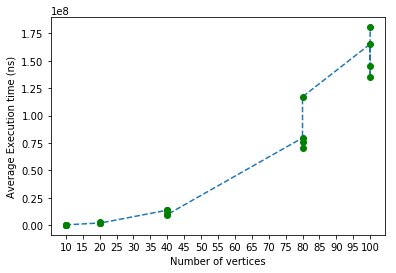

In [10]:
import matplotlib.pyplot as plt 
repeated_results_naive = sorted(repeated_results_naive,key=lambda repeated_result_naive: repeated_result_naive[0]) #plot the result here
print(repeated_results_naive)
x_val = [x[0] for x in repeated_results_naive]
y_val = [x[1] for x in repeated_results_naive]
plt.locator_params('x',nbins = 20)
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Average Execution time (ns)")
plt.xlabel("Number of vertices")
plt.show()